In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import torch
import torch.autograd as autograd
import torch.nn as nn
import matplotlib.pyplot as plt
from numpy import format_float_scientific as ffs
import sys
sys.path.append("..")
import time as Time
torch.set_default_dtype(torch.float64)
torch.set_printoptions(precision=5)
device = 'cpu'

In [2]:
%load_ext autoreload
%autoreload 2
from Forward_Parameter import t2, time_span

In [3]:
collocation_points = np.arange(0, t2, time_span)

In [4]:
from PINN_Save import Save_Loss_forward, Save_PINN_forward
from Forward_Parameter import seed, max_iteration, epsilon, save
from Forward_PINN import Sequentialmodel

filename = "Non-Dim run"

start = Time.time()
torch.manual_seed(seed); np.random.seed(seed) #Fix seed 

weight = 1; layers = np.array([1,20,20,20,20,20,20,20,20,2])

PINN = Sequentialmodel(layers, collocation_points, config = 'non_dim_mixed2', reduction = torch.mean).to(device)

params = list(PINN.parameters())
optimizer = torch.optim.LBFGS(params, lr=1.0, 
                              max_iter = 1, 
                              max_eval = 100, 
                              tolerance_grad = 1e-20, 
                              tolerance_change = 1e-6 * 1e-6, 
                              history_size = 100, 
                              line_search_fn = "strong_wolfe")

PINN.set_optimizer(optimizer)


loss_list ={"total":[0], 
            "ini":[], 
            "ode":[], 
            "p": [], 
            "q": [],
            "iter": []}


for i in range(30000):
    optimizer.step(PINN.closure)
    Save_Loss_forward(PINN, loss_list, i)
    
    if((loss_list["total"][-1]) < 5e-6):
        break
    
del loss_list["total"][0]

Save_PINN_forward(PINN, filename, loss_list)

end = Time.time()

print("Traininig time = ", end - start, " [s]")

Step: 1 	 Total loss: 2.4640e+00  	 Initial Loss: 2.4610e+00 	  PDE Loss: 2.967656e-03
Step: 2 	 Total loss: 1.6922e+00  	 Initial Loss: 1.6893e+00 	  PDE Loss: 2.921680e-03
Step: 3 	 Total loss: 1.6922e+00  	 Initial Loss: 1.6893e+00 	  PDE Loss: 2.921680e-03
Step: 4 	 Total loss: 4.1038e-02  	 Initial Loss: 3.6637e-02 	  PDE Loss: 4.400975e-03
Step: 5 	 Total loss: 4.1038e-02  	 Initial Loss: 3.6637e-02 	  PDE Loss: 4.400975e-03
Step: 6 	 Total loss: 5.4666e-03  	 Initial Loss: 2.9035e-03 	  PDE Loss: 2.563072e-03
Step: 7 	 Total loss: 5.4666e-03  	 Initial Loss: 2.9035e-03 	  PDE Loss: 2.563072e-03
Step: 8 	 Total loss: 2.0111e-03  	 Initial Loss: 1.1595e-04 	  PDE Loss: 1.895179e-03
Step: 9 	 Total loss: 2.0111e-03  	 Initial Loss: 1.1595e-04 	  PDE Loss: 1.895179e-03
Step: 100 	 Total loss: 1.0461e-03  	 Initial Loss: 1.2055e-05 	  PDE Loss: 1.034081e-03
Step: 200 	 Total loss: 4.5122e-04  	 Initial Loss: 3.7069e-07 	  PDE Loss: 4.508456e-04
Step: 300 	 Total loss: 3.9725e-04  	 I

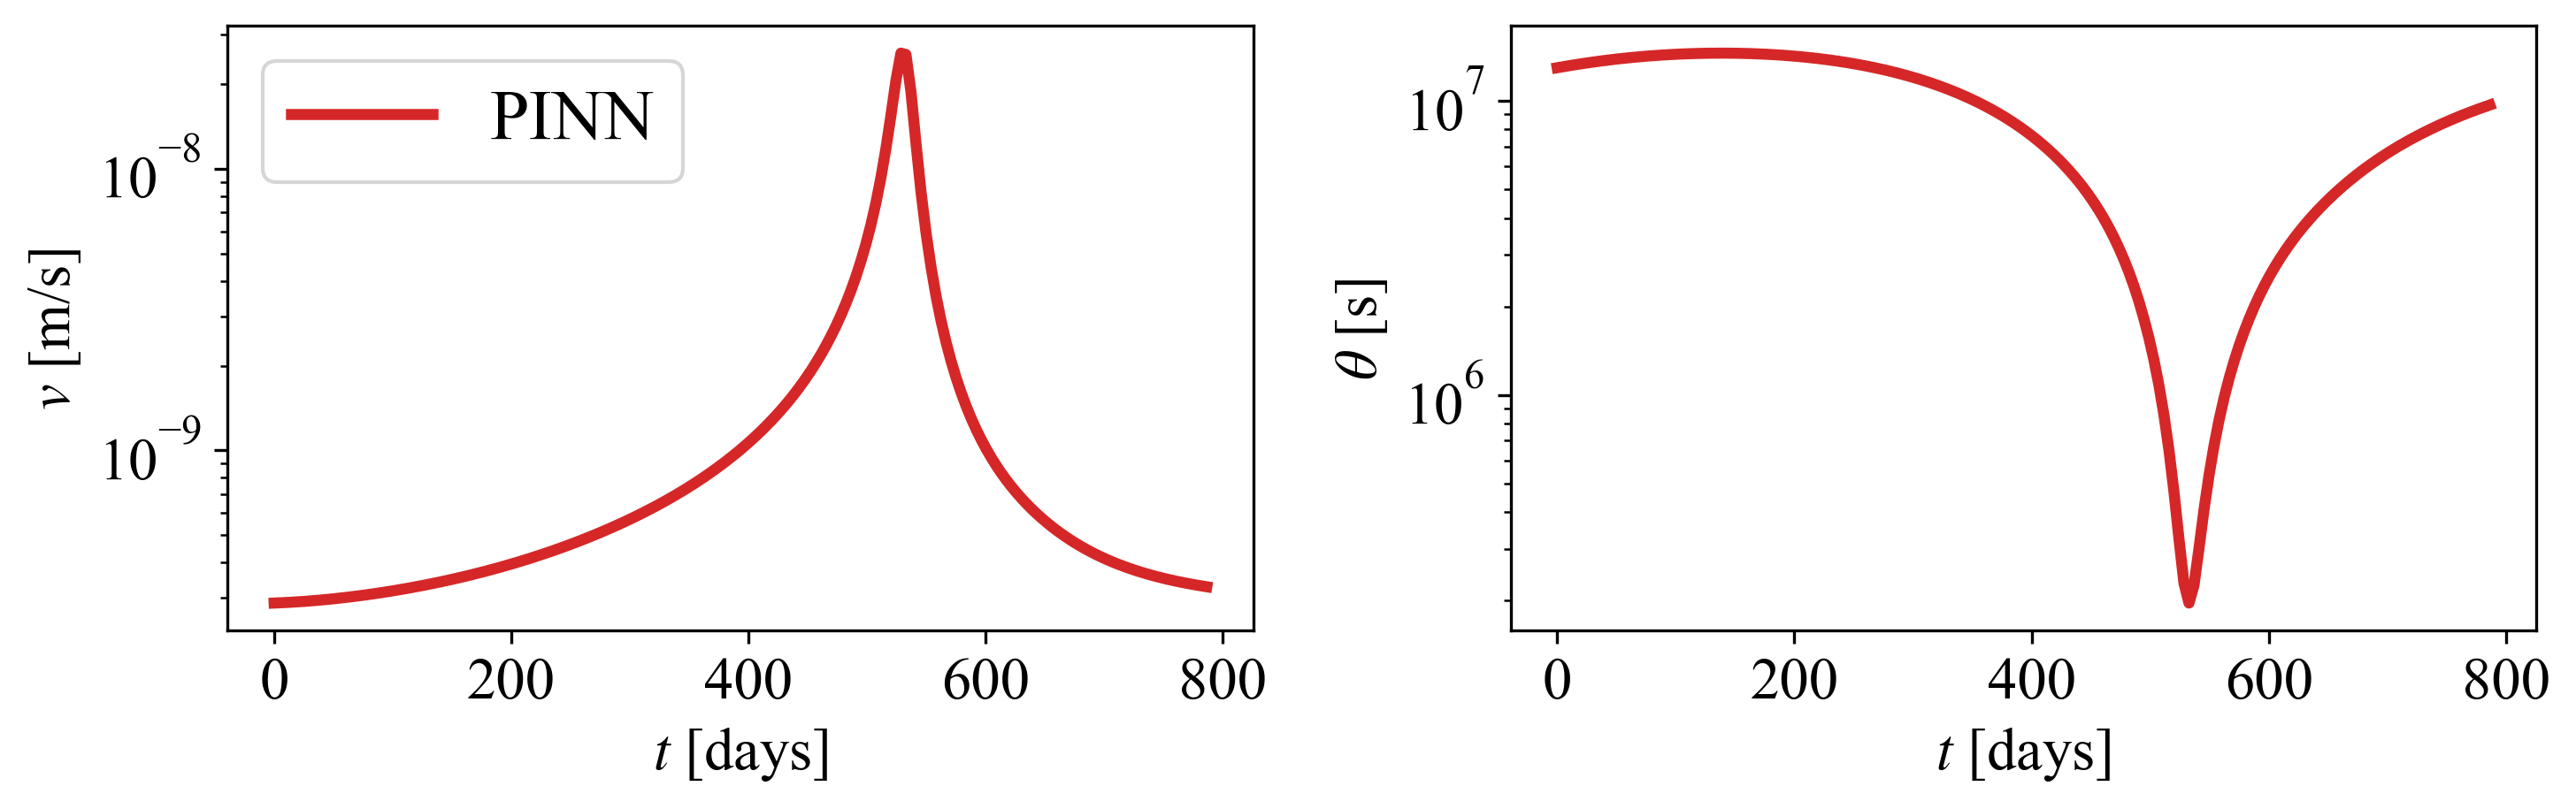

L    :  4.97e-06
Lode :  4.969e-06
Lini :  9.842e-10
Iteration :  1745


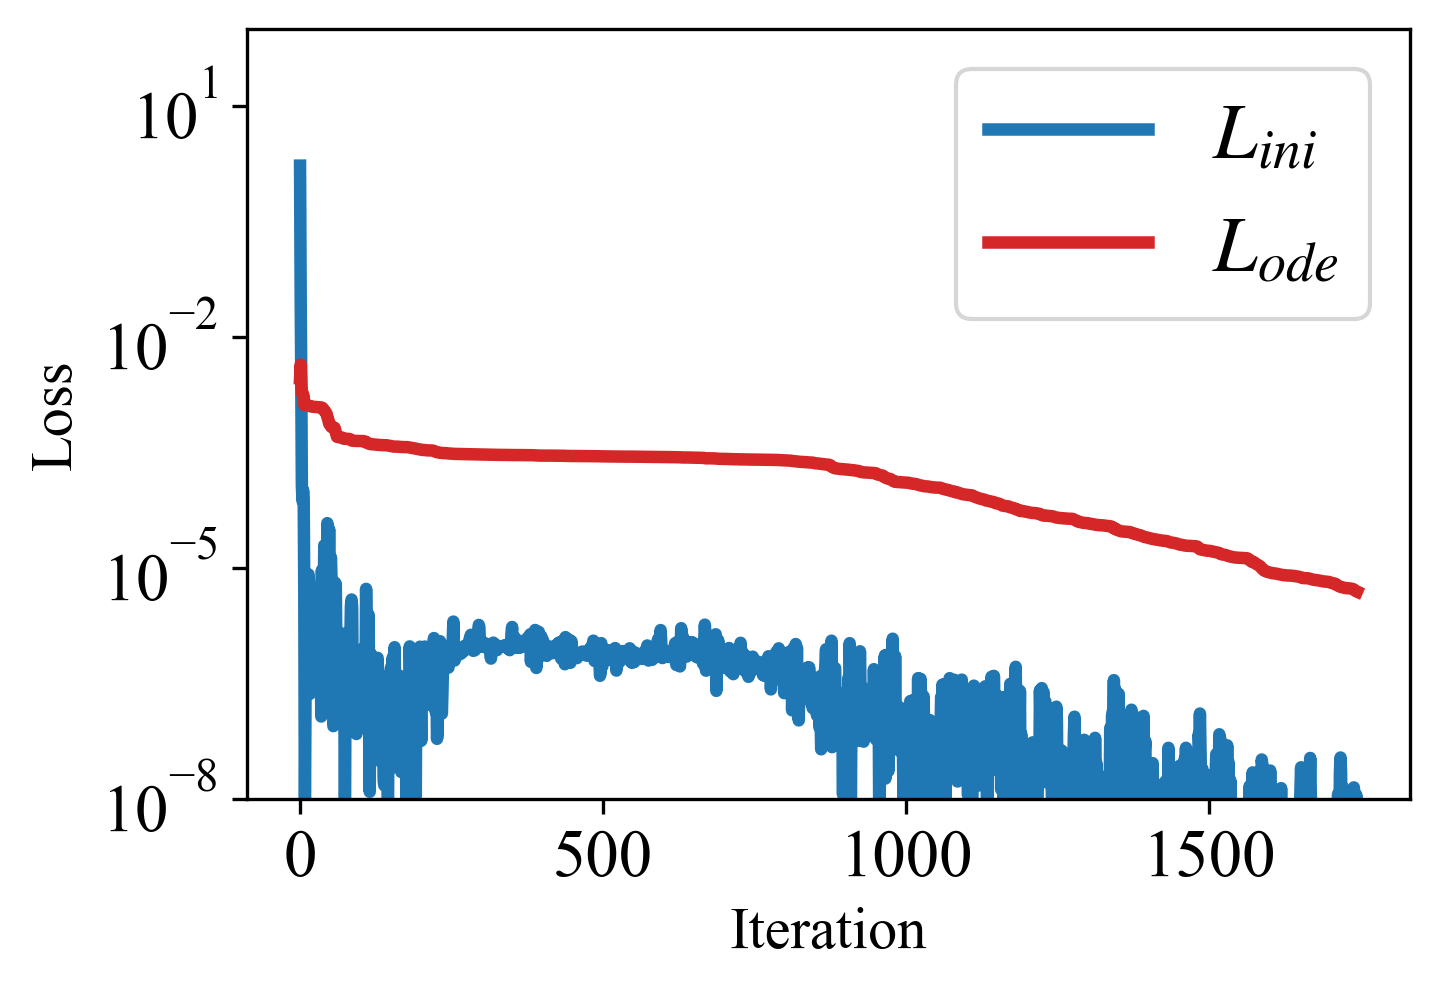

In [5]:
from Forward_Plot import Result
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
Result = Result(PINN, loss_list, filename)
Result.plot_vtheta(save)
Result.plot_loss(save)

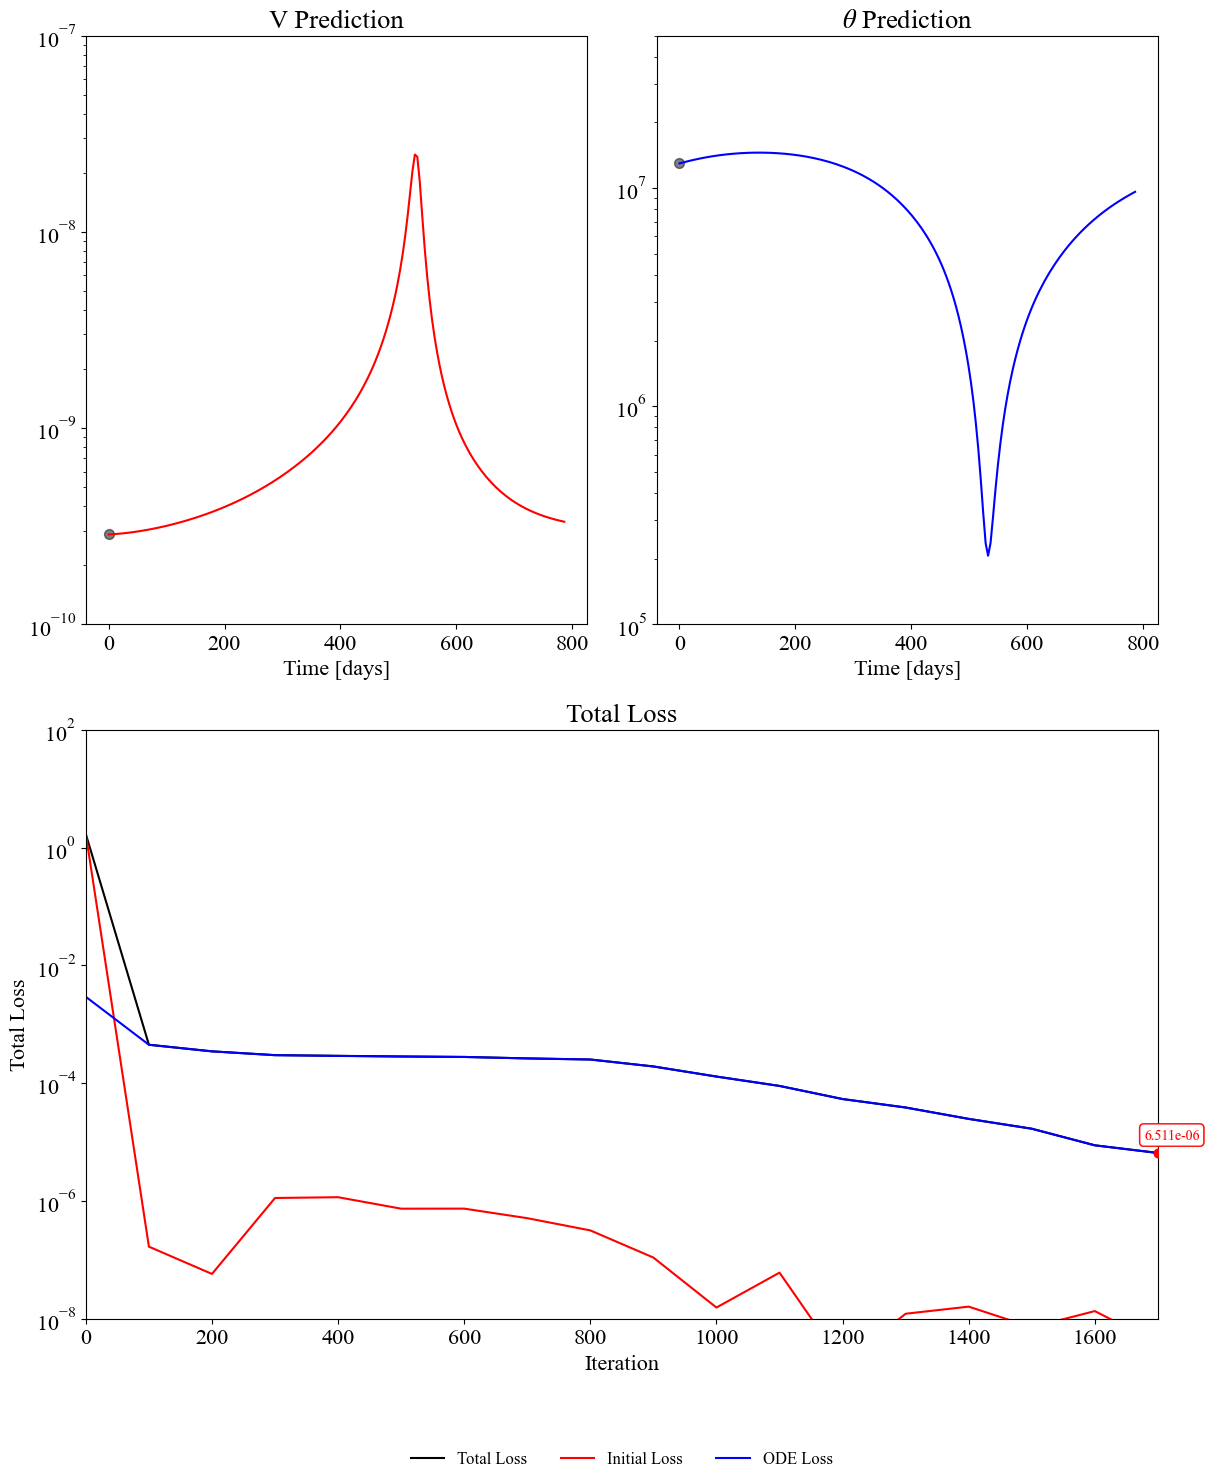

In [6]:
Result.animation_plotSpecial()